In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#load the data
df_complete = pd.read_csv("eval_test.csv")
display(df_complete.info())
display(df_complete)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                200 non-null    int64  
 1   repetition_number         200 non-null    int64  
 2   weight_index              200 non-null    int64  
 3   weight_tuple              200 non-null    object 
 4   num_iterations            200 non-null    int64  
 5   vehicle_id                200 non-null    int64  
 6   normalised_speed_reward   200 non-null    float64
 7   normalised_energy_reward  200 non-null    float64
 8   raw_speed_reward          200 non-null    float64
 9   raw_energy_reward         200 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 15.8+ KB


None

,Unnamed: 0,repetition_number,weight_index,weight_tuple,num_iterations,vehicle_id,normalised_speed_reward,normalised_energy_reward,raw_speed_reward,raw_energy_reward
0,0,0,0,"[0.0, 1.0]",15,0,0.376054,0.668613,5.640817,10.029197
1,1,0,0,"[0.0, 1.0]",15,1,0.033911,0.983555,0.508661,14.753323
2,2,1,0,"[0.0, 1.0]",80,0,0.047826,0.999946,3.826060,79.995657
3,3,1,0,"[0.0, 1.0]",80,1,0.047930,0.999918,3.834405,79.993444
4,4,2,0,"[0.0, 1.0]",80,0,0.033329,0.985214,2.666320,78.817102
...,...,...,...,...,...,...,...,...,...,...
195,195,2,19,"[1.0, 0.0]",80,1,0.016084,0.968199,1.286683,77.455894
196,196,3,19,"[1.0, 0.0]",80,0,0.047949,0.999913,3.835931,79.993038
197,197,3,19,"[1.0, 0.0]",80,1,0.491635,0.808872,39.330796,64.709792
198,198,4,19,"[1.0, 0.0]",80,0,0.034284,0.986216,2.742698,78.897265


In [3]:
grouped_df = df_complete.groupby(["vehicle_id","weight_index"])["num_iterations"].mean()
grouped_df = grouped_df.reset_index()
print(grouped_df)
#sns.scatterplot(grouped_df, x="normalised_speed_reward",hue="vehicle_id")

    vehicle_id  weight_index  num_iterations
0            0             0            59.8
1            0             1            56.2
2            0             2            66.0
3            0             3            52.0
4            0             4            55.6
5            0             5            53.4
6            0             6            50.8
7            0             7            51.8
8            0             8            52.0
9            0             9            44.8
10           0            10            31.6
11           0            11            54.2
12           0            12            67.2
13           0            13            39.0
14           0            14            67.4
15           0            15            43.8
16           0            16            50.0
17           0            17            46.8
18           0            18            30.0
19           0            19            55.2
20           1             0            59.8
21        

<Axes: xlabel='weight_index', ylabel='num_iterations'>

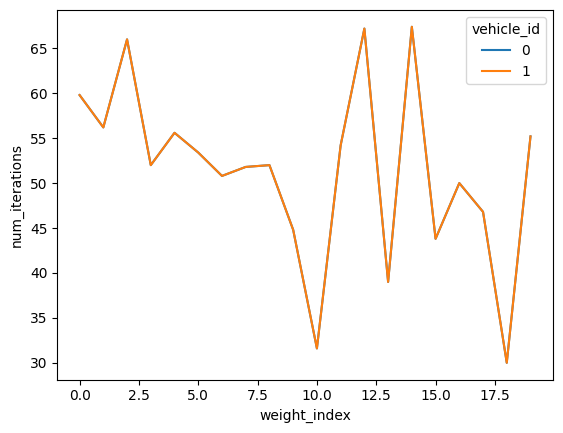

In [4]:
sns.lineplot(grouped_df, x="weight_index",y="num_iterations",hue="vehicle_id")

<Axes: xlabel='normalised_speed_reward', ylabel='normalised_energy_reward'>

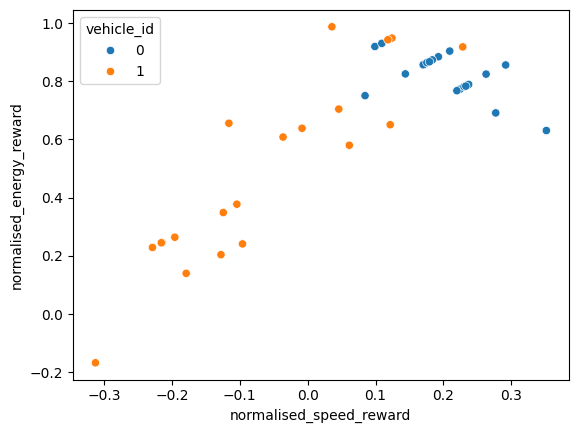

In [5]:
grouped_df = df_complete.groupby(["vehicle_id","weight_index"])[["normalised_speed_reward", "normalised_energy_reward"]].mean()
grouped_df = grouped_df.reset_index()
sns.scatterplot(grouped_df, x="normalised_speed_reward", y="normalised_energy_reward", hue="vehicle_id")

In [6]:
#load the data
df_complete = pd.read_csv("loss_test.csv")
display(df_complete.info())
display(df_complete)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458284 entries, 0 to 458283
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  458284 non-null  int64  
 1   episode     458268 non-null  float64
 2   loss        458268 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 10.5 MB


None

,Unnamed: 0,episode,loss
0,0,NaN,NaN
1,1,NaN,NaN
2,2,NaN,NaN
3,3,NaN,NaN
4,4,NaN,NaN
...,...,...,...
458279,458279,9999.0,0.024701
458280,458280,9999.0,0.051273
458281,458281,9999.0,0.057953
458282,458282,9999.0,0.046373


<Axes: xlabel='episode'>

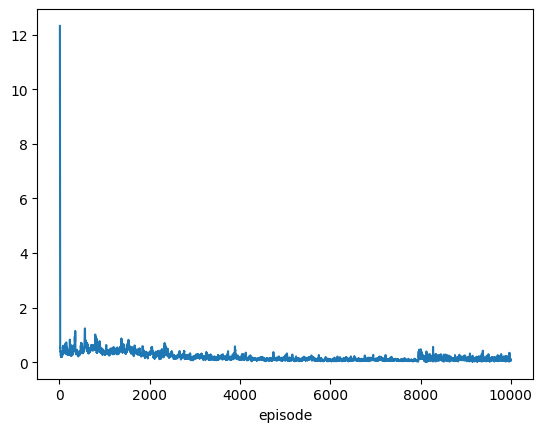

In [7]:
grouped_df = df_complete.groupby("episode")["loss"].mean()
grouped_df.to_frame().reset_index()
grouped_df.plot()

In [8]:
import sys, os
sys.path.append("../")
import gymnasium as gym
import mo_gymnasium as mo_gym
import numpy as np
from src import MOMA_DQN
from matplotlib import pyplot as plt
import matplotlib
import pandas as pd
import torch

env = mo_gym.make('moma-highway-env-v0', render_mode='rgb_array')
env.unwrapped.configure({
    "screen_width": 500,
    "screen_height": 500,
    "vehicles_count": 10,
    "controlled_vehicles": 2,
    "action": {
        "type": "MultiAgentAction",
        "action_config": {
            "type": "DiscreteMetaAction",
        }
    }
})

obs, info = env.reset()
obs = [torch.tensor(single_obs) for single_obs in obs] #reshape observations and
obs = [single_obs[~torch.isnan(single_obs)].reshape(1,-1) for single_obs in obs] #remove nan values
agent = MOMA_DQN.MOMA_DQN(env, num_objectives=2, seed=11, replay_buffer_size=1000, batch_ratio=0.3, use_multi_dqn=False, reward_structure="mean_reward", observation_space_name="Kinematics")
agent.load_network("model_test.pth")

In [9]:
agent.evaluate(num_points=5, render_episodes=True)













Weight tuple: 100%|██████████| 5/5 [00:44<00:00,  8.96s/it]


(    repetition_number  weight_index  \
 0                   0             0   
 1                   0             0   
 2                   1             0   
 3                   1             0   
 4                   2             0   
 5                   2             0   
 6                   3             0   
 7                   3             0   
 8                   4             0   
 9                   4             0   
 10                  0             1   
 11                  0             1   
 12                  1             1   
 13                  1             1   
 14                  2             1   
 15                  2             1   
 16                  3             1   
 17                  3             1   
 18                  4             1   
 19                  4             1   
 20                  0             2   
 21                  0             2   
 22                  1             2   
 23                  1             2   
